# MPA-MLF, Lab 2 - K-means

K-means is one of the most popular unsupervised machine learning algorithms, well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc.

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example:
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the center of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

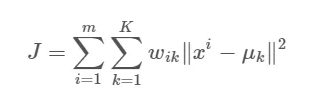

where:
   - *k* represents number of clusters (groups)
   - *m* represents number of points
   - u_k represents centroids
   - x_i represents data point
   - w_ik represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. assign data points to the closest centroids
  5.  calculate distances
  6. calculate objective function
  7. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  8. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


Tips:
- Try to avoid using loops what if it is not necessary, instead of using loops, use numpy functions. There is a list of numpy functions that you might find usefull:
    - np.argmin()
    - np.where()
    - np.transpose()
    - np.random.permutation()
    - np.random.schuffle()
    - np.linalg.norm()
    - np.arange()
    - np.split()
    - np.random.choice()


- Since the initial clusters are selected randomly, so the algorithm can lead to different results each time its runned. To obtain the best results, it is helpful to run the algorithm multiple times and select result with the lowest objective function


### Code

**Please note that the code structure provided below is only a recommendation. If you prefer, you can use your own code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach**

In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np

### 0. Load dataset

Use the following code to load data

In [26]:
loaded_points = np.load('Data/k_mean_points.npy')
plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

FileNotFoundError: [Errno 2] No such file or directory: 'Data/k_mean_points.npy'

### 1. Specify number of clusters *K*

In [ ]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k* points as initial centroids

In [ ]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    """
    Initializes and returns k random centroids from the given dataset.

    Parameters:
    points (np.array): Array of data points.
    k_clusters (int): The number of clusters to form.

    Returns:
    np.array: Array of initialized centroids.
    """
    np.random.permutation(points)
    centroids=points[:k_clusters]

    return centroids

In [ ]:
centroids=initialize_clusters(loaded_points.linalg.norm(),k)

### 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [ ]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    points (np.array): Array of data points.
    centroid (np.array): A single centroid.

    Returns:
    np.array: Array of distance metrics.
    """
    distances_list=[]
    for loop in points:
      distances_list.append(np.linalg.norm(centroid - loop,axis=0))


    return np.asarray(distances_list)

In [ ]:
calculate_metric(loaded_points,centroids[0])

3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [13]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    points (np.array): Array of data points.
    centroids_points (np.array): Array of centroid points.

    Returns:
    np.array: 2D array with distances of each point to each centroid.
    """
    distances_list=[]
    for loop in range(len(centroids_points)):
      distances_list.append(calculate_metric(points,centroids_points[loop]))

    return np.asarray(distances_list)

In [14]:
distances=compute_distances(loaded_points, centroids)

NameError: name 'loaded_points' is not defined

### 4. Assign datapoints to the closest centroids

In [4]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    distances (np.array): 2D array with distances of each point to each centroid.

    Returns:
    np.array: Array indicating the closest centroid for each data point.
    """

    return np.argmin(distances, axis=0)

In [5]:
cluster_assignment=assign_centroids(distances)

NameError: name 'distances' is not defined

### 5. Calculate objective function

In [6]:
def calculate_objective(cluster_belongs: np.array, distances: np.array) -> np.array:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    cluster_belongs (np.array): Array indicating the cluster assignment for each point.
    distances (np.array): 2D array with distances of each point to each centroid.

    Returns:
    np.array: Objective function value.
    """

    minimal_values=[distances[cluster_belongs,norm(distances.shape[1])]]

    return minimal_values.sum()

### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [18]:
def calculate_new_centroids(points: np.array, clusters_belongs: np.array, n_of_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    points (np.array): Array of data points.
    clusters_belongs (np.array): Array indicating the cluster assignment for each point.
    n_of_clusters (int): Number of clusters.

    Returns:
    np.array: Array of new centroids.
    """

    list=np.array([])
    for loop in range(n_of_clusters):
      list.append(np.array([]))


    for i in range(len(points)):
      for loop in range(n_of_clusters):
        if clusters_belongs[i]==loop:
          list[loop].append(points[i])

    result=np.array([])
    for elements in list:
      result.append(elements.average())


    return result

###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [ ]:
def fit(points: np.array, n_of_centroids: int, clusters_belongs: np.array, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    points (np.array): Array of data points.
    n_of_centroids (int): Number of centroids (clusters).
    n_of_oterations (int): Maximum number of iterations.
    error (float): Threshold for convergence.

    Returns:
    tuple: Tuple containing final centroids and last objective function value.
    """

    centroid_points = np.array([])
    last_objective = 10000

    for _ in range(n_of_oterations):
      centroid_points=calculate_new_centroids(points,clusters_belongs,n_of_centroids)

      last_objective=calculate_objective(points,centroid_points,n_of_centroids)

    return centroid_points, last_objective

### All together

# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids *k* as an input, and it is not usually that obvious, there are some methods that exist to choose the right number of centroids at the beginning. In this part of a lecture, we would describe two methods to choose the right *k* value, *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

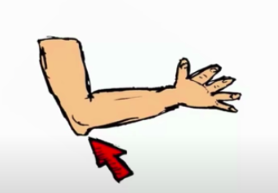 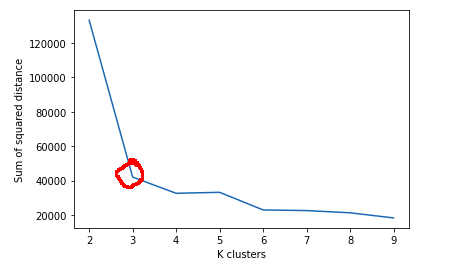

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

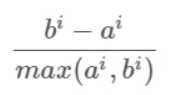

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple,
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

In [28]:
k_all = range(2, 10)
all_objective = []


#WRITE YOUR CODE HERE
for loop in k_all:
  cluster_points,all_objective[loop]=fit(loaded_points,loop,cluster_assignment)



NameError: name 'fit' is not defined

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

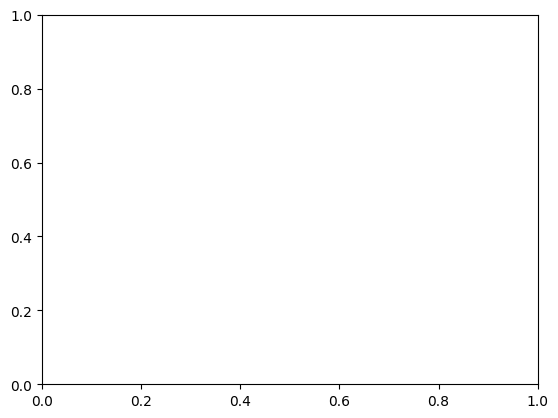

In [27]:
plt.figure()
plt.plot(k_all, all_objective, 50)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

   1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
   2. Initialize the K_means algorithm, where K would be equal to the number of colors in the compressed image
   3. check cluster centroids and convert them to integers - these are your new colors (kmeans.cluster_centers_ could be useful)
   4. replace your 2D arrays colors with newly generated colors
   5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image, you can work on your algorithm using different (smaller) image
- the implementation can be done in single function

In [ ]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

In [24]:
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

NameError: name 'imread' is not defined

In [ ]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    centroids=initialize_clusters(image,number_of_colours)
    distances_list=compute_distances(image,centroids)
    assignment_list=assign_centroids(distances_list)


    #Reassignment of the centroid color to each point assigned to it
    for i in range(len(image)):
      for j in range(number_of_colours):
        if assignment_list[i]=j:
          image[i][2]=centroids[j][2]


    return image


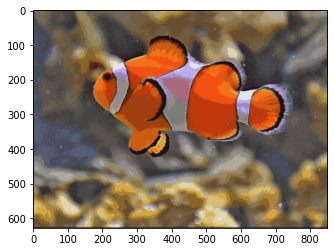

In [ ]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()